(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


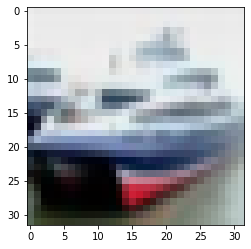

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras.backend import dropout
import matplotlib.pyplot as plt
(X_train, y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
plt.imshow(X_test[1])

In [ ]:
X_train = X_train.reshape(50000,3072) #3073hang
X_test = X_test.reshape(10000,3072)
X_train_scale = X_train.astype('float32')
X_test_scale = X_test.astype('float32')
X_train_scale =X_train_scale/255
X_test_scale = X_test_scale/255
y_train_scale = to_categorical(y_train,10)
y_test_scale = to_categorical(y_test,10)
print(X_train_scale[0])


[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]


In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary() # hienthi noi dung model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
history = model.fit(X_train_scale,y_train_scale,batch_size=128,epochs=200,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=80)])
score = model.evaluate(X_test_scale,y_test_scale,verbose=1)


Epoch 1/200
313/313 [==============================] - 5s 6ms/step - loss: 2.1237 - accuracy: 0.2334 - val_loss: 1.8823 - val_accuracy: 0.3093
Epoch 2/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8949 - accuracy: 0.3138 - val_loss: 1.8212 - val_accuracy: 0.3347
Epoch 3/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8209 - accuracy: 0.3451 - val_loss: 1.7529 - val_accuracy: 0.3781
Epoch 4/200
313/313 [==============================] - 2s 5ms/step - loss: 1.7789 - accuracy: 0.3627 - val_loss: 1.8473 - val_accuracy: 0.3270
Epoch 5/200
313/313 [==============================] - 2s 8ms/step - loss: 1.7328 - accuracy: 0.3776 - val_loss: 1.7851 - val_accuracy: 0.3546
Epoch 6/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6994 - accuracy: 0.3925 - val_loss: 1.7138 - val_accuracy: 0.3922
Epoch 7/200
313/313 [==============================] - 1s 5ms/step - loss: 1.6858 - accuracy: 0.3938 - val_loss: 1.6990 - val_accuracy: 0.4023

In [ ]:
score = model.evaluate(X_test_scale,y_test_scale,verbose=1)
print('test loss: ',score[0])
print( 'test accuracy: ',score[1])


313/313 [==============================] - 1s 3ms/step - loss: 1.4870 - accuracy: 0.4847
test loss:  1.487001895904541
test accuracy:  0.4846999943256378


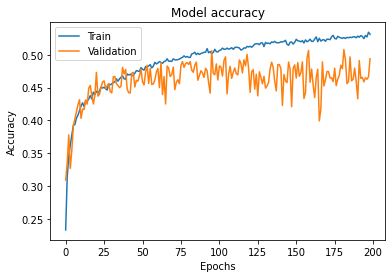

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()


In [ ]:
prediction = model.predict(X_test_scale[:1])
print(prediction)

[[0.01867479 0.00965353 0.03985129 0.30193666 0.01218246 0.5772135
  0.01564091 0.00874969 0.01185205 0.00424514]]
